<img src="logo.png" alt="UMU logo" height="10px" width="200px"  style="display:block; margin-left:auto; margin-right:auto;">

# UMU Data Analysis and Visualization

<h4> Hitanghu Moses Mulongo - 2024-M132-20791 </h4>
<p> Group Assignment </p>

<h2> Install Packages </h2>

In [216]:
#!pip install umap-learn
#!pip install pandas numpy matplotlib seaborn scikit-learn

<h2>Importing packages</h2>

In [218]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,auc,RocCurveDisplay
from sklearn.calibration import calibration_curve
from sklearn.neighbors import KNeighborsClassifier


In [4]:
# load data 
breast_cancer_df = pd.read_csv("breast_cancer.csv")
breast_cancer_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Drop Unnamed:32 Column
breast_cancer_df.drop(['Unnamed: 32'], axis=1,inplace=True)

<h2> 1.0 Display Summary Statistics </h2>

In [8]:
#Calculate summary statisitcs
summary_stat_df = breast_cancer_df.describe().T
summary_stat_df = summary_stat_df.copy()
#calculate IQR
summary_stat_df['IQR'] = summary_stat_df['75%'] - summary_stat_df['25%']
#Drop unnecessary columns
summary_stat_df.drop(['count','25%','50%','75%','max'], axis=1,inplace=True)
#display records
summary_stat_df

,mean,std,min,IQR
id,3.037183e+07,1.250206e+08,8670.000000,7.943911e+06
radius_mean,1.412729e+01,3.524049e+00,6.981000,4.080000e+00
texture_mean,1.928965e+01,4.301036e+00,9.710000,5.630000e+00
perimeter_mean,9.196903e+01,2.429898e+01,43.790000,2.893000e+01
area_mean,6.548891e+02,3.519141e+02,143.500000,3.624000e+02
smoothness_mean,9.636028e-02,1.406413e-02,0.052630,1.893000e-02
compactness_mean,1.043410e-01,5.281276e-02,0.019380,6.548000e-02
concavity_mean,8.879932e-02,7.971981e-02,0.000000,1.011400e-01
concave points_mean,4.891915e-02,3.880284e-02,0.000000,5.369000e-02
symmetry_mean,1.811619e-01,2.741428e-02,0.106000,3.380000e-02


<h2>Histograms for each attribute</h2>

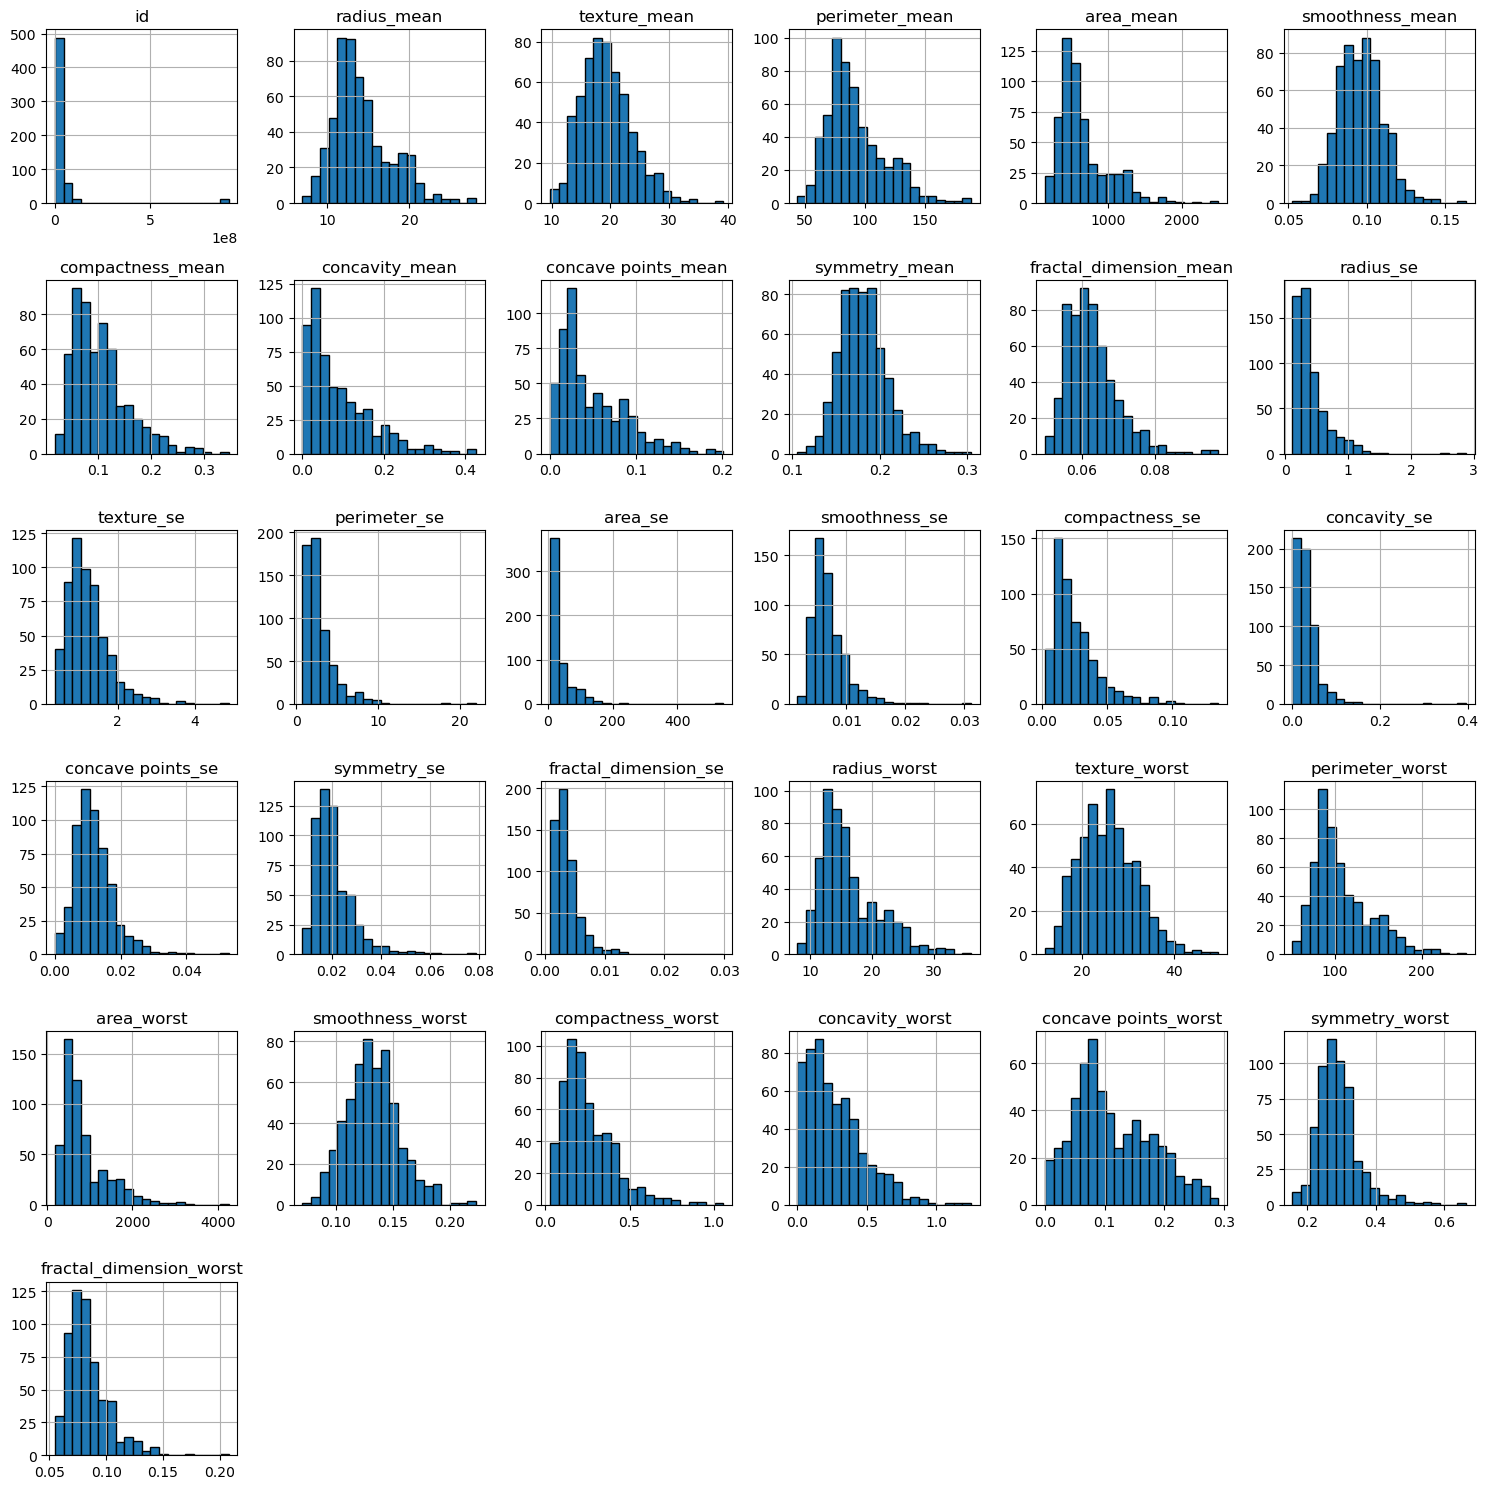

In [65]:
breast_cancer_df.hist(figsize=(15, 15), bins=20, edgecolor='black')
plt.tight_layout()  # Adjust spacing
plt.show()

<h2>1.2 Boxplots comparing benign vs malignant tumors </h2>

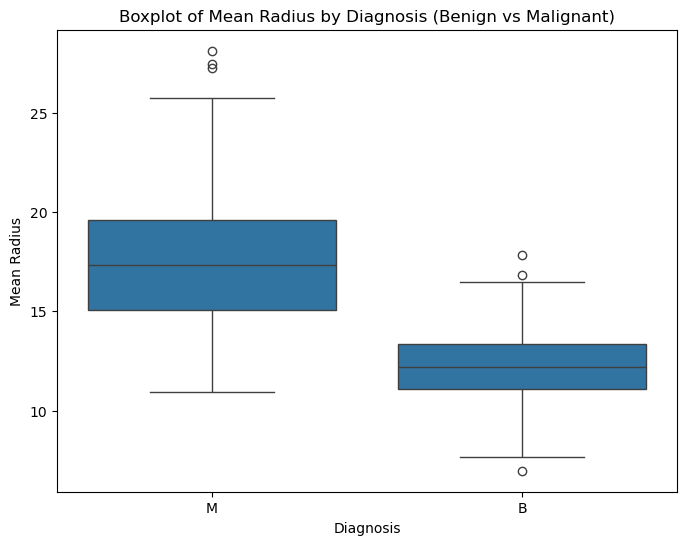

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=breast_cancer_df)

plt.title("Boxplot of Mean Radius by Diagnosis (Benign vs Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Mean Radius")
plt.show()

In [10]:
# Encode dianosis feature and store the results into Class which will serve as our target variable
breast_cancer_df['Class'] = breast_cancer_df['diagnosis'].map({'B': 0, 'M': 1})

<h2> 1.3 Scatter plots between top 2 features</h2>
<p> The top features will be determined best on their correlation with the target variable as shown bellow</p>

<h4> 1.3.1 Calculate correlations between the features and the target variable </h4>

In [12]:
# Compute correlation with target
features_df = breast_cancer_df.drop('diagnosis',axis=1)
correlations_df = features_df.corr()['Class'].drop('Class').abs().sort_values(ascending=False)
correlations_df.head(5)


concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
Name: Class, dtype: float64

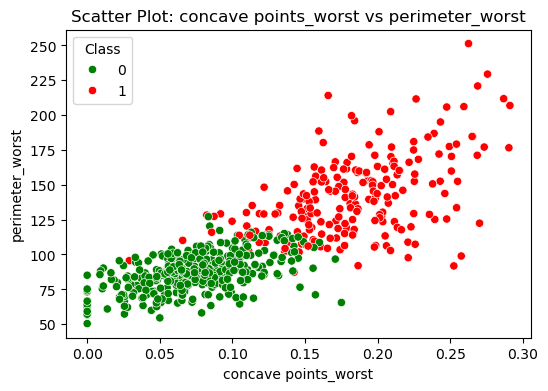

In [14]:

# Example: select top 2 features
top_features = ['concave points_worst', 'perimeter_worst'] 
target = 'Class'

plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=breast_cancer_df[top_features[0]],
    y=breast_cancer_df[top_features[1]],
    hue=breast_cancer_df[target],
    palette=['green', 'red'],
)
plt.title(f"Scatter Plot: {top_features[0]} vs {top_features[1]}")
plt.show()


<h2> 2.0 Preprocessing </h2>

<h4> 2.1 Missing values </h4>

In [75]:
#display columns with missing values
breast_cancer_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Class                      0
dtype: int64

<p> --- The dataset has no missing values --- </p>

<h4> Normalizing all continous columns </h4>

In [16]:
#extract numeric columns
numeric_cols = breast_cancer_df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('Class')  # remove target

scaler = MinMaxScaler()
breast_cancer_df[numeric_cols] = scaler.fit_transform(breast_cancer_df[numeric_cols])

# Check for values
breast_cancer_df[numeric_cols].head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


<p> --- All numeric columns have been normalized to have values between 0 and 1  --- </p>

<h2> 3.0	Feature Engineering & Reduction </h2>

<h4> 3.1  Generating some rations </h4>
<p> The ratios bellow will be generated that are important for analysis; </p>

- radius_mean / texture_mean -> <b> size vs texture </b>
- area_mean / perimeter_mean  - > <b> area per unit perimeter </b>
- concavity_mean / concave points_mean -> <b>concavity per concave point</b>
- compactness_mean / smoothness_mean -> <b>compactness relative to smoothness</b>

In [18]:
#creating new ratio features
breast_cancer_df['radius_texture_ratio'] = breast_cancer_df['radius_mean'] / breast_cancer_df['texture_mean']
breast_cancer_df['area_perimeter_ratio'] = breast_cancer_df['area_mean'] / breast_cancer_df['perimeter_mean']
breast_cancer_df['concavity_points_ratio'] = breast_cancer_df['concavity_mean'] / breast_cancer_df['concave points_mean']
breast_cancer_df['compactness_smoothness_ratio'] = breast_cancer_df['compactness_mean'] / breast_cancer_df['smoothness_mean']
breast_cancer_df['perimeter_radius_ratio'] = breast_cancer_df['perimeter_mean'] / breast_cancer_df['radius_mean']

# inspecting new features
breast_cancer_df[['radius_texture_ratio', 'area_perimeter_ratio', 
                  'concavity_points_ratio', 'compactness_smoothness_ratio',
                  'perimeter_radius_ratio']].head()

,radius_texture_ratio,area_perimeter_ratio,concavity_points_ratio,compactness_smoothness_ratio,perimeter_radius_ratio
0,22.995637,0.666191,0.961738,1.333951,1.047887
1,2.359526,0.814557,0.583810,0.627046,0.957457
2,1.541267,0.754380,0.727579,0.838050,0.990437
3,0.582228,0.440706,1.081745,1.000050,1.111433
4,4.022878,0.775436,0.894920,0.808393,1.001736


<h4>3.2 Apply Recursive Feature Elimination (RFE) </h4>
<p> Recursive Feature Elimination (RFE) is a method to select the most important features for predicting a target by recursively removing the least important ones.</p>

In [84]:
#Checking for possible missing values
breast_cancer_df.isnull().sum()

id                               0
diagnosis                        0
radius_mean                      0
texture_mean                     0
perimeter_mean                   0
area_mean                        0
smoothness_mean                  0
compactness_mean                 0
concavity_mean                   0
concave points_mean              0
symmetry_mean                    0
fractal_dimension_mean           0
radius_se                        0
texture_se                       0
perimeter_se                     0
area_se                          0
smoothness_se                    0
compactness_se                   0
concavity_se                     0
concave points_se                0
symmetry_se                      0
fractal_dimension_se             0
radius_worst                     0
texture_worst                    0
perimeter_worst                  0
area_worst                       0
smoothness_worst                 0
compactness_worst                0
concavity_worst     

In [20]:
cols_with_nulls = ['compactness_smoothness_ratio','radius_texture_ratio','area_perimeter_ratio', 'concavity_points_ratio','perimeter_radius_ratio']
breast_cancer_df[cols_with_nulls] = breast_cancer_df[cols_with_nulls].fillna( breast_cancer_df[cols_with_nulls].mean())
breast_cancer_df.isnull().sum()

id                              0
diagnosis                       0
radius_mean                     0
texture_mean                    0
perimeter_mean                  0
area_mean                       0
smoothness_mean                 0
compactness_mean                0
concavity_mean                  0
concave points_mean             0
symmetry_mean                   0
fractal_dimension_mean          0
radius_se                       0
texture_se                      0
perimeter_se                    0
area_se                         0
smoothness_se                   0
compactness_se                  0
concavity_se                    0
concave points_se               0
symmetry_se                     0
fractal_dimension_se            0
radius_worst                    0
texture_worst                   0
perimeter_worst                 0
area_worst                      0
smoothness_worst                0
compactness_worst               0
concavity_worst                 0
concave points

<p> --- We can now proceeding with training our random forest model since our df is clean --- </p>

In [28]:
# Features (exclude 'id', 'diagnosis', and 'Class')
X = breast_cancer_df.drop(['id', 'diagnosis', 'Class'], axis=1)

X.replace([np.inf, -np.inf], np.nan, inplace=True) # removes infinity values that might be caused by the ratios
# Target (encode 'diagnosis' as 0/1 )
y = breast_cancer_df['Class']  #  0=benign, 1=malignant

# Using RandomForestClassifier as the estimator
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Select top 10 features 
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y)



,estimator,RandomForestC...ndom_state=42)
,n_features_to_select,10
,step,1
,verbose,0
,importance_getter,'auto'
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [30]:
# selected features
selected_features = X.columns[rfe.support_]
print("Top features selected by RFE:")
print(selected_features)


Top features selected by RFE:
Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


<h4> Display a ranking of features as ranked by the random forest model </h4>

In [90]:
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

feature_ranking

,Feature,Ranking
26,concavity_worst,1
2,perimeter_mean,1
3,area_mean,1
23,area_worst,1
22,perimeter_worst,1
6,concavity_mean,1
7,concave points_mean,1
21,texture_worst,1
20,radius_worst,1
27,concave points_worst,1


<h4> 3.3 PCA, t-SNE, and UMAP  </h4>
<p> The goal for dimensionality reduction using PCA, t-SNE, and UMAP is to reduce the features while preserving structure or variance.</p>

<h4> 3.3.1 Prepare numeric features </h4>

In [66]:

# Drop non-numeric / target columns
X = breast_cancer_df.drop(['id', 'diagnosis', 'Class'], axis=1)
cols_with_nulls =['radius_texture_ratio','compactness_smoothness_ratio']
X[cols_with_nulls] = X[cols_with_nulls].fillna( X[cols_with_nulls].mean())
X.replace([np.inf, -np.inf], np.nan, inplace=True) # removes infinity values that might be caused by the ratios
# Ensure all numeric
X = X.select_dtypes(include='number')


In [68]:
#Replace null values due to the calculated ratios
X = X.fillna(X.mean())
print(X.isna().sum().sum())

0


<h4> 3.3.2 PCA </h4>

Explained variance ratio: [0.66368983 0.15724561]
Total variance captured: 0.8209354367207651


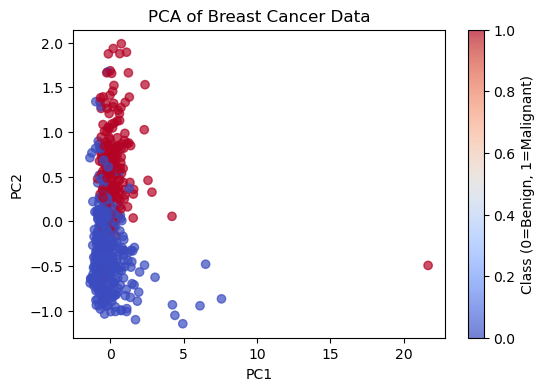

In [70]:
from sklearn.decomposition import PCA

# Reduce to approximately 95%
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", sum(pca.explained_variance_ratio_))

# Scatter plot

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=breast_cancer_df['Class'], cmap='coolwarm', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Breast Cancer Data")
plt.colorbar(label='Class (0=Benign, 1=Malignant)')
plt.show()


<h4> 3.3.3  3: t-SNE </h4> 

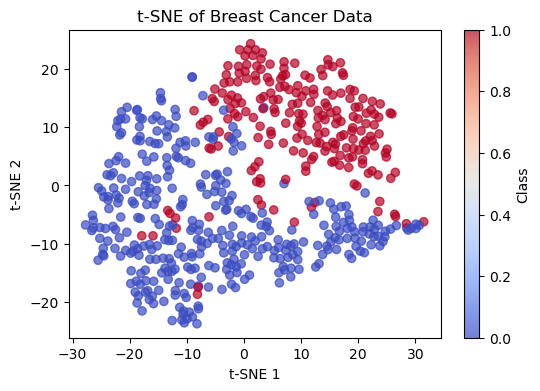

In [72]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=breast_cancer_df['Class'], cmap='coolwarm', alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE of Breast Cancer Data")
plt.colorbar(label='Class')
plt.show()


<h4> 3.3.4 UMAP</h4>

C:\Users\Moshe\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


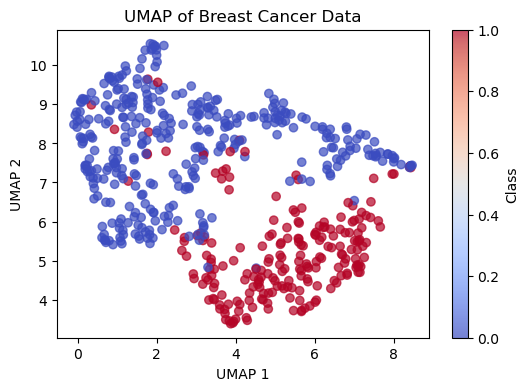

In [78]:
import umap

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X_umap[:,0], X_umap[:,1], c=breast_cancer_df['Class'], cmap='coolwarm', alpha=0.7)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("UMAP of Breast Cancer Data")
plt.colorbar(label='Class')
plt.show()


<h4> Feature importance visualization from Decision Tree </h4>

In [86]:

# Features (exclude id, diagnosis, Class)
X = breast_cancer_df.drop(['id', 'diagnosis', 'Class'], axis=1)
X.replace([np.inf, -np.inf], np.nan, inplace=True) # removes infinity values that might be caused by the ratios
y = breast_cancer_df['Class']  # 0=benign, 1=malignant


In [90]:
X = X.fillna(X.mean()) #fill possible null values with mean before training
X.isna().sum().sum()

0

In [92]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [96]:
# Get feature importances
importances = dt.feature_importances_
feature_names = X.columns

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)  # top 10 features


,Feature,Importance
20,radius_worst,0.701232
27,concave points_worst,0.107097
21,texture_worst,0.057354
16,concavity_se,0.031841
1,texture_mean,0.031208
13,area_se,0.016253
23,area_worst,0.011086
7,concave points_mean,0.008771
26,concavity_worst,0.007474
24,smoothness_worst,0.007388


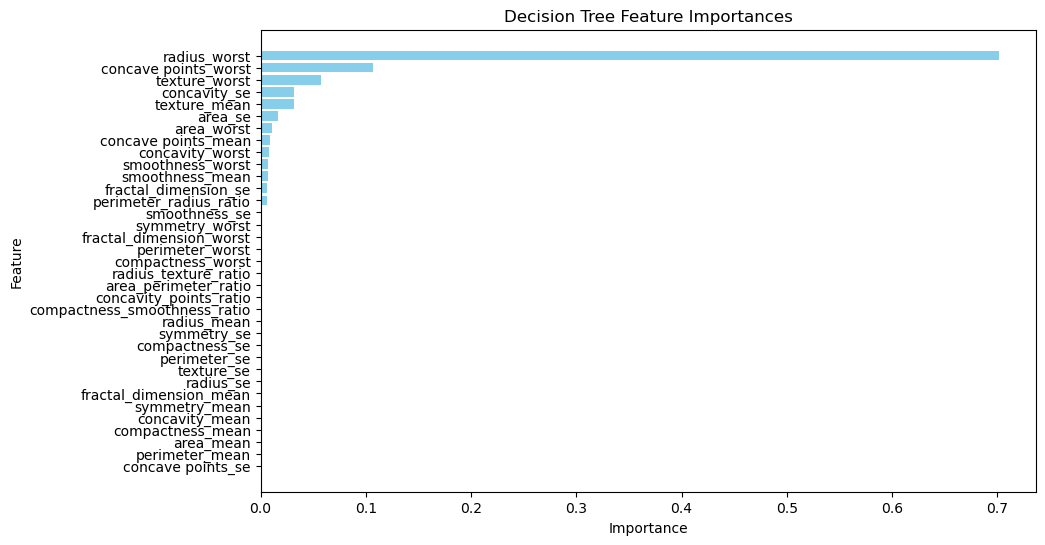

In [98]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # largest importance on top
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importances")
plt.show()


<h2> 5.0	ML Modeling: Train Naïve Bayes and  k-NN </h2>

<h4> 5.1 Split data into training and testing sets </h4>

In [100]:

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


<h4> 5.2 Initialize and train the Gausian model  </h4>

In [105]:
# Initialize model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


<h4> 5.3 Pridict using the test dataset </h4>

In [111]:
y_pred = nb_model.predict(X_test)
y_proba = nb_model.predict_proba(X_test)[:, 1]


<h4> 5.4 Model Evaluation </h4>

<h6> 5.4.1 Accuracy </h6>

In [185]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



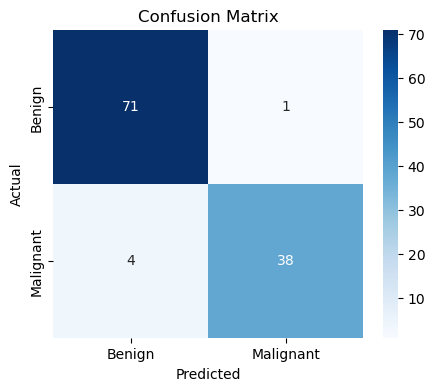

In [194]:

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



<h6> 5.4.2  Sensitivity & Specificity </h6>

In [118]:
# -------------------------------
# Sensitivity & Specificity
# -------------------------------
TN, FP, FN, TP = cm.ravel()
sensitivity = TP / (TP + FN)   # True Positive Rate
specificity = TN / (TN + FP)   # True Negative Rate
print(f"Sensitivity (Recall+ for malignant): {sensitivity:.3f}")
print(f"Specificity (True Negative Rate): {specificity:.3f}")

Sensitivity (Recall+ for malignant): 0.857
Specificity (True Negative Rate): 0.958


<h6> 5.4.3 ROC Curve </h6>

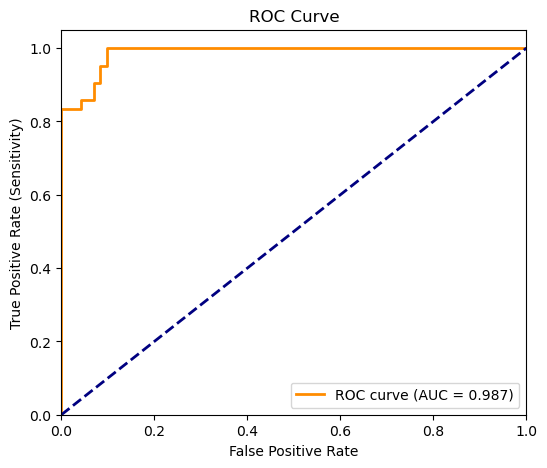

In [127]:
# -------------------------------
# ROC Curve
# -------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

<h6> 5.4.6 Calibration Curve </h6>

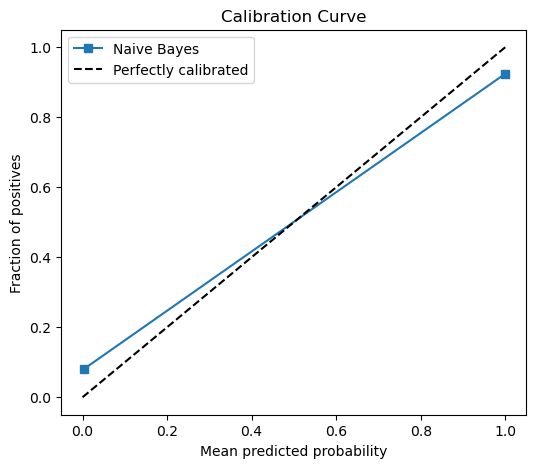

In [135]:
# -------------------------------
# Calibration Curve
# -------------------------------
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

plt.figure(figsize=(6,5))
plt.plot(prob_pred, prob_true, "s-", label="Naive Bayes")
plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve")
plt.legend()
plt.show()

<h4> Interpretation: </h4>

This <b>Gausian model</b> performs very well, with high accuracy (95.6%), high precision (97.4%), and good recall (90.5%).

- Only 1 benign case was misclassified as malignant.

- Only 4 malignant cases were missed (i.e., predicted as benign).

The low false negative rate is crucial in medical settings because missing a malignant tumor can have serious consequences.

<h4> 5.5 KNN Model </h4>

<h4> 5.5.1 Initialize and train model </h4>

In [147]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_proba = knn_model.predict_proba(X_test)[:, 1]  # probability for malignant (class=1)

<h4> 5.2 Evaluation </h4>

<h4> 5.2.1 Accuracy </h4>

In [200]:
#Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



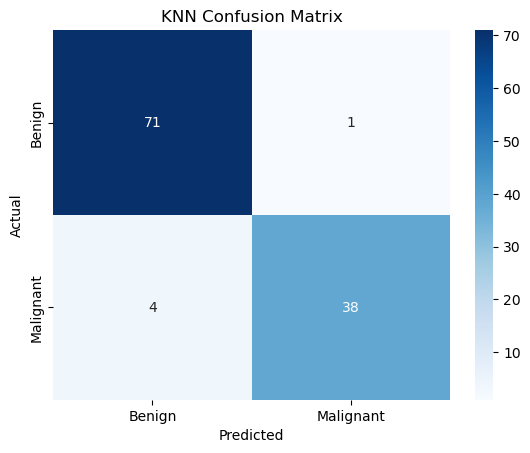

In [202]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malignant'],
            yticklabels=['Benign','Malignant'])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix_2.png", dpi=300)
plt.show()

<h4> 5.2.2 Sensitivity & Specificity </h4>

In [155]:
# -------------------------------
# Sensitivity & Specificity
# -------------------------------
TN, FP, FN, TP = cm.ravel()
sensitivity = TP / (TP + FN)   # True Positive Rate
specificity = TN / (TN + FP)   # True Negative Rate
print(f"Sensitivity (Recall+ for malignant): {sensitivity:.3f}")
print(f"Specificity (True Negative Rate): {specificity:.3f}")

Sensitivity (Recall+ for malignant): 0.905
Specificity (True Negative Rate): 0.986


<h4> 5.2.3 ROC Curve & AUC </h4>

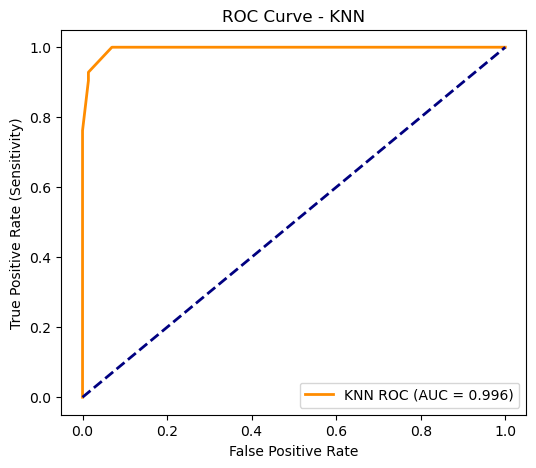

In [158]:
# -------------------------------
# ROC Curve & AUC
# -------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"KNN ROC (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.show()

<h4> 5.2.3 Calibration Curve </h4>

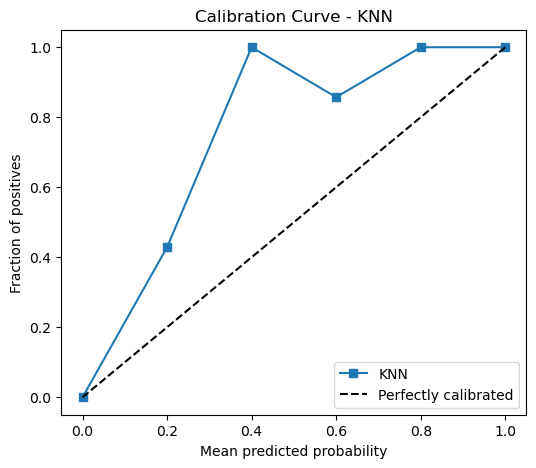

In [163]:

# -------------------------------
# Calibration Curve
# -------------------------------
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

plt.figure(figsize=(6,5))
plt.plot(prob_pred, prob_true, "s-", label="KNN")
plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve - KNN")
plt.legend()
plt.show()


<h2> KNN Model Performance </h2>
<h4> Meaning of Numbers</h4>

- True Negatives (TN) = 71

- 71 Benign cases were correctly classified as Benign.

- False Positives (FP) = 1

- 1 Benign case was incorrectly classified as Malignant.

- 4 Malignant cases were incorrectly classified as Benign.

- True Positives (TP) = 38

- 38 Malignant cases were correctly classified as Malignant.

<b> Interpretation </b>
- The model performs very well overall, with a 95.6% accuracy.
- Excellent at detecting Benign cases (Specificity = 98.6%).
- Very few false positives (only 1 case).
- There are 4 False Negatives, meaning 4 Malignant cases were missed and classified as Benign.


<h2> 7.	Interpretation </h2>


<p> Both and KNN models performs high with accuracy of 95%. Hovwever, the following features seperate benin form malignant; </p>

* **Size-related features**:

  * radius_mean, perimeter_mean, area_mean -> Malignant tumors tend to be larger and less regular.

* **Shape irregularity**:

  * compactness_mean, concavity_mean, concave points_mean ->  Malignant tumors often have **irregular borders** and concave shapes.



* **Texture & smoothness**:

  * texture_mean, smoothness_mean -> Malignant tumors often have more heterogeneous textures compared to benign ones.



<h4> The following are the Implications of False Negatives in Healthcare; </h4>

A **false negative** = predicting a tumor is **benign** when it is actually **malignant**.

**This is dangerous in the following ways**

* The patient **does not receive timely treatment**.
* Cancer may **progress to an advanced stage**, requiring more aggressive treatment (chemo, surgery, radiation).
* Delays reduce survival rates — in breast cancer, **early detection is critical** for high survival (>90%), but late detection reduces survival dramatically.

**Implications:**

* **Medical**: Worsening prognosis, higher mortality, increased treatment complexity.
* **Ethical**: Doctors have a duty to minimize harm; false negatives can be seen as negligence if frequent.
* **Psychological**: Patient falsely reassured → later shock and trauma when cancer is finally detected.
* **Economic**: Later-stage treatments are far more expensive than early interventions.

**In healthcare, sensitivity (catching as many malignant cases as possible) should be priotized even if it means more false positives**.
This is why screening tools aim for **high recall** — it’s safer to flag a benign case as suspicious (false positive) than to miss a malignant one.



<h2> End of Assignment </h2>